In [1]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())

    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(self.path_to_data)
        logger.info(fname)

        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = '{}recision_recall_f1score_dictionary_not_stemmed_FRAMES.json'.format(self.path_to_data)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read())

        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df, df2])
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}SML_results_text_cleaned'.format(self.path_to_data)
        with open(fname_sml) as handle:
            dictdump =  json.loads(handle.read())
        df = pd.DataFrame.from_dict(dictdump)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)
      #  df[]'frame', inplace=True)
        df = df[['class_name','f1_macro', 'precision_macro', 'recall_macro', 'accuracy']]
        df.rename(columns={'class_name': 'classifier', 'f1_macro' : 'f1-score', 'precision_macro' : 'precision', 'recall_macro' : 'recall'}, inplace=True)
        df['approach'] = 'SML'
        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        return df

In [2]:
PATH = '../output/frames/'
OUTPUT_PATH ='../output/'

a = plot_accuracy_precision_recall(PATH, OUTPUT_PATH)
df = a.combine_datasets()

df

2020-02-05 10:02:57,958 : INFO : ../output/frames/recision_recall_f1score_dictionary_stemmed_FRAMES.json
2020-02-05 10:02:57,999 : INFO : ../output/frames/recision_recall_f1score_dictionary_not_stemmed_FRAMES.json
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,accuracy,approach,classifier,f1-score,precision,recall,Frame
Attribution of responsibility,0.458084,Dictionary Approach,Dictionary - stemmed,0.403542,0.540986,0.517712,Attribution of responsibility
Conflict,0.526946,Dictionary Approach,Dictionary - stemmed,0.454113,0.536914,0.518495,Conflict
Economic consequences,0.685629,Dictionary Approach,Dictionary - stemmed,0.684993,0.716829,0.726260,Economic consequences
Human interest,0.371257,Dictionary Approach,Dictionary - stemmed,0.368518,0.579137,0.562025,Human interest
Attribution of responsibility,0.467066,Dictionary Approach,Dictionary - not stemmed,0.391060,0.633301,0.535038,Attribution of responsibility
Conflict,0.556886,Dictionary Approach,Dictionary - not stemmed,0.502976,0.582538,0.549313,Conflict
Economic consequences,0.724551,Dictionary Approach,Dictionary - not stemmed,0.723121,0.745373,0.760401,Economic consequences
Human interest,0.413174,Dictionary Approach,Dictionary - not stemmed,0.412647,0.546343,0.550161,Human interest
Human interest,0.741977,SML,SVC count embedding,0.465764,0.836641,0.520668,Human interest
Human interest,0.738156,SML,ET tifdf embedding,0.549008,0.656115,0.559218,Human interest


2020-02-05 10:04:16,247 : WARNING : No handles with labels found to put in legend.


Saved figure as: ../figures/classification_frames


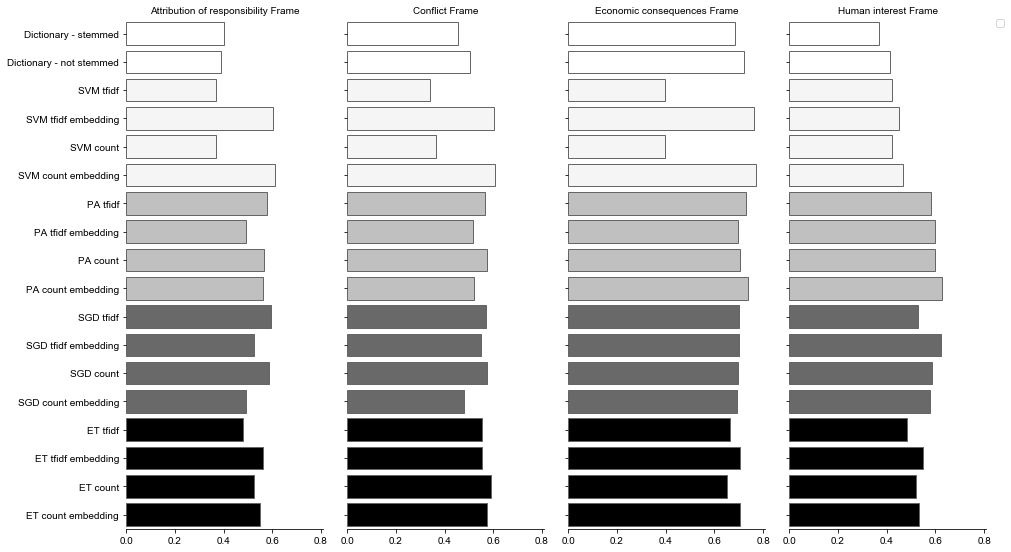

In [3]:
d = { 'Dictionary - stemmed':'Dictionary - stemmed',
     'Dictionary - not stemmed':  'Dictionary - not stemmed',
     'SVC count embedding': 'Support Vector Machines (SVM) ~ w2v count',
      'SVC tfidf embedding':  'Support Vector Machines (SVM) ~ w2v tfidf',
     'ET count':  'ExtraTrees ~ count',
    'ET tfidf':  'ExtraTrees ~ tfidf',
    'ET count embedding' : 'ExtraTrees ~ w2v count',
    'SVC tfidf': 'Support Vector Machines (SVM) ~ tfidf',
    'SVC count': 'Support Vector Machines (SVM) ~ count',
        'ET tifdf embedding':  'ExtraTrees ~ w2v tfidf',
        'PA tfidf': 'Passive Agressive ~ tfidf',
        'PA count': 'Passive Agressive ~ count',
        'PA count embedding': 'Passive Agressive ~ w2v count',
        'PA tfidf embedding':  'Passive Agressive ~ w2v tfidf',
     'SGD count': 'Stochastic Gradient Descent (SGD) ~ count',
     'SGD count embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v count',
     'SGD tfidf' : 'Stochastic Gradient Descent (SGD) ~ tfidf',
     'SGD tfidf embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' }

df['classifier_updated'] = df['classifier'].map(d)

final_recode = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
 'Dictionary - not stemmed' : 'Dictionary - not stemmed' ,
 'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
 'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
 'ExtraTrees ~ count' : 'ET count',
 'ExtraTrees ~ tfidf' : 'ET tfidf',
 'ExtraTrees ~ w2v count' : 'ET count embedding',
 'Support Vector Machines (SVM) ~ tfidf' : 'SVM tfidf',
 'Support Vector Machines (SVM) ~ count' :  'SVM count',
 'ExtraTrees ~ w2v tfidf' :  'ET tfidf embedding',
 'Passive Agressive ~ tfidf' :  'PA tfidf',
 'Passive Agressive ~ count' :  'PA count',
 'Passive Agressive ~ w2v count' :  'PA count embedding',
 'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
 'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
 'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
 'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

df['classifier_updated_final'] = df['classifier_updated'].map(final_recode)

order = ['Dictionary - stemmed', 'Dictionary - not stemmed',  'SVM tfidf', 'SVM tfidf embedding', 'SVM count', 'SVM count embedding', 'PA tfidf', 'PA tfidf embedding', 'PA count', 'PA count embedding', 'SGD tfidf', 'SGD tfidf embedding', 'SGD count', 'SGD count embedding', 'ET tfidf', 'ET tfidf embedding', 'ET count', 'ET count embedding']

colour = ['white', 'white', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'silver', 'silver', 'silver', 'silver', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'black', 'black', 'black', 'black']

ax = sns.catplot(y="classifier_updated_final", x="f1-score", edgecolor=".4", palette=colour, col="Frame", order = order,
                data=df, kind="bar", saturation=.5,
                height=8, aspect=.45)

ax.set_titles("{col_name} {col_var}").despine(left=True)

ax.set(xlabel=None, ylabel=None)

ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title(None)
#plt.ylabel(None)
#plt.xlabel(None)

fname = '{}classification_frames'.format('../figures/')
plt.savefig(fname, bbox_inches = 'tight')
print('Saved figure as: {}'.format(fname))

sorterIndex = dict(zip(order,range(len(order))))
# Generate a rank column that will be used to sort
# the dataframe numerically
df['Tm_Rank'] = df['classifier_updated_final'].map(sorterIndex)
df.sort_values(['Frame','Tm_Rank']).to_csv('../output/results_frames.csv')
